In [13]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
#Names of columns from our database
df = pd.read_csv("covid_data.csv")
for col in df.columns:
    print(col)
#We change name for future
df.rename(columns= {'DATE_DIED':"DEATH"},inplace=True)

USMER
MEDICAL_UNIT
SEX
PATIENT_TYPE
DATE_DIED
INTUBED
PNEUMONIA
AGE
PREGNANT
DIABETES
COPD
ASTHMA
INMSUPR
HIPERTENSION
OTHER_DISEASE
CARDIOVASCULAR
OBESITY
RENAL_CHRONIC
TOBACCO
CLASIFFICATION_FINAL
ICU


In [3]:
#All columns I wanna include
cols =['USMER','MEDICAL_UNIT','SEX','PATIENT_TYPE','DEATH','INTUBED','PNEUMONIA','AGE','PREGNANT','DIABETES',
          'COPD','ASTHMA','HIPERTENSION','OTHER_DISEASE',
          'CARDIOVASCULAR','OBESITY','RENAL_CHRONIC','TOBACCO']

In [4]:
#Deleted columns which I don't understand
df = df.drop('INMSUPR', axis=1)
df = df.drop('CLASIFFICATION_FINAL', axis=1)
df = df.drop('ICU', axis=1)

In [5]:
df_for_stats = df.iloc[:2000]
cols_for_stats=cols
cols_for_stats.remove("DEATH")
for col in cols:
    print("For ",col,
          ":\nMean: ",df_for_stats[col].mean(),
         "\nMin: ",df_for_stats[col].min(),
         "\nMax: ",df_for_stats[col].max(),
         "\nStd: ",df_for_stats[col].std())

For  USMER :
Mean:  1.4255 
Min:  1 
Max:  2 
Std:  0.49454224897172244
For  MEDICAL_UNIT :
Mean:  2.7645 
Min:  1 
Max:  3 
Std:  0.5755044332377798
For  SEX :
Mean:  1.594 
Min:  1 
Max:  2 
Std:  0.491207331298262
For  PATIENT_TYPE :
Mean:  1.745 
Min:  1 
Max:  2 
Std:  0.4359702226270835
For  INTUBED :
Mean:  30.557 
Min:  1 
Max:  99 
Std:  43.9777531529999
For  PNEUMONIA :
Mean:  2.2775 
Min:  1 
Max:  99 
Std:  9.734108597354592
For  AGE :
Mean:  56.1155 
Min:  0 
Max:  100 
Std:  19.370590327473693
For  PREGNANT :
Mean:  58.5235 
Min:  1 
Max:  98 
Std:  46.650300889024486
For  DIABETES :
Mean:  2.1125 
Min:  1 
Max:  98 
Std:  6.465272122796605
For  COPD :
Mean:  2.4 
Min:  1 
Max:  98 
Std:  6.431538100732248
For  ASTHMA :
Mean:  2.4115 
Min:  1 
Max:  98 
Std:  6.429917547670025
For  HIPERTENSION :
Mean:  2.116 
Min:  1 
Max:  98 
Std:  6.815700322449832
For  OTHER_DISEASE :
Mean:  2.7285 
Min:  1 
Max:  98 
Std:  8.55998974661951
For  CARDIOVASCULAR :
Mean:  2.4695 
Min:  

In [6]:
#Preprocessing

#Change values in columns to more friendly
def change(column,points,names=None):
    if not names:
        names= range(len(points)+1)
    colCut= pd.cut(column,bins = [column.min()]+ points+[column.max()],labels=names,include_lowest=True)
    return colCut

repSex = {1: "Female", 2: "Male"}
df.replace({"SEX": repSex},inplace=True)
df['AGE']=change(df['AGE'],[1,11,18,60],["Unknown","Child","Teenager","Adult","Senior"])
repDate={"9999-99-99":"No"}
df.replace({"DEATH":repDate},inplace=True)
df["DEATH"] = df["DEATH"].str.replace(r"^(.(?<!No))*?$","Yes")
#https://www.kaggle.com/datasets/meirnizri/covid19-dataset



/var/folders/qf/xtn5gyt9037fqpz53c9yc8wc0000gn/T/ipykernel_30671/843561719.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df["DEATH"] = df["DEATH"].str.replace(r"^(.(?<!No))*?$","Yes")


In [7]:

df['INTUBED']=change(df['INTUBED'],[90],["No","Yes"])
df['PREGNANT']=change(df['PREGNANT'],[97],["No","Yes"])
df['HIPERTENSION']=change(df['HIPERTENSION'],[90],["No","Yes"])
df['PNEUMONIA']=change(df['PNEUMONIA'],[90],["No","Yes"])
df['TOBACCO']=change(df['TOBACCO'],[90],["No","Yes"])
df['OTHER_DISEASE']=change(df['OTHER_DISEASE'],[90],["No","Yes"])
df['CARDIOVASCULAR']=change(df['CARDIOVASCULAR'],[90],["No","Yes"])
df['OBESITY']=change(df['OBESITY'],[90],["No","Yes"])
df['RENAL_CHRONIC']=change(df['RENAL_CHRONIC'],[90],["No","Yes"])
df['ASTHMA']=change(df['ASTHMA'],[90],["No","Yes"])
df['COPD']=change(df['COPD'],[90],["No","Yes"])
df['DIABETES']=change(df['DIABETES'],[90],["No","Yes"])

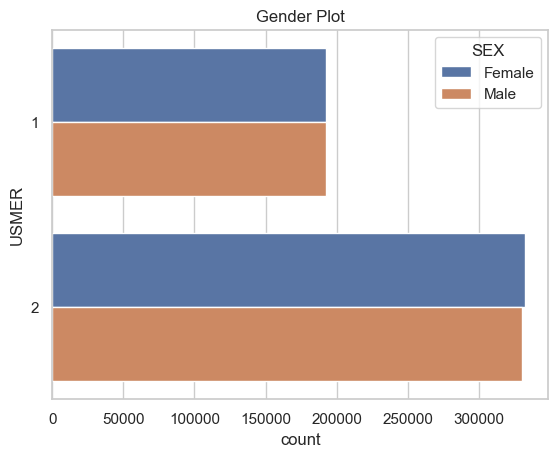

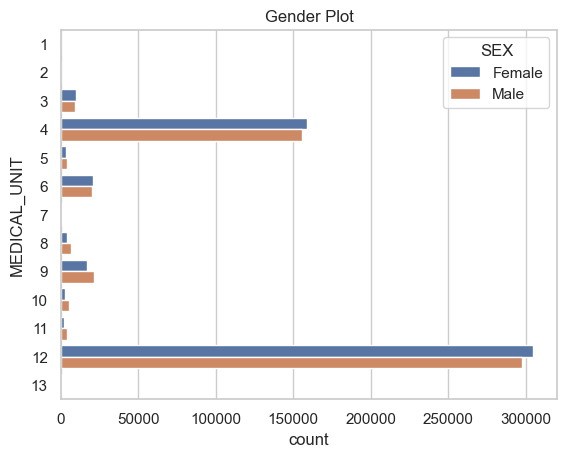

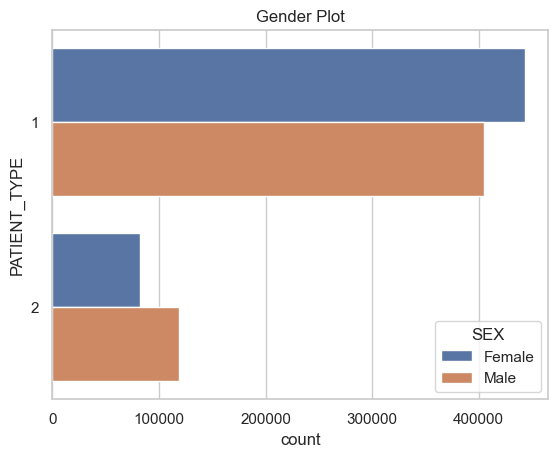

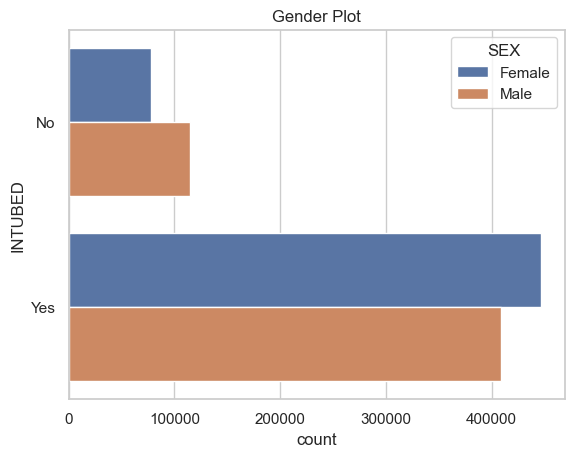

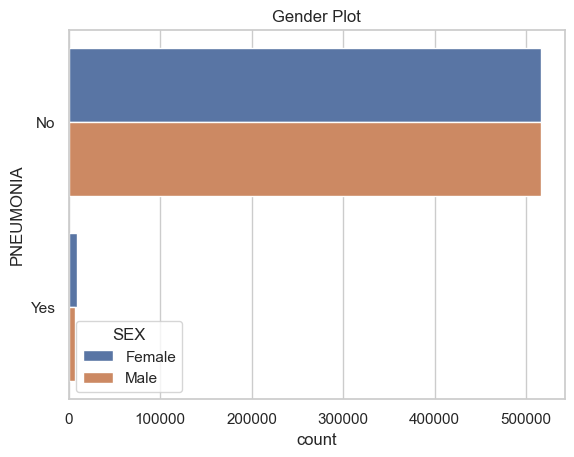

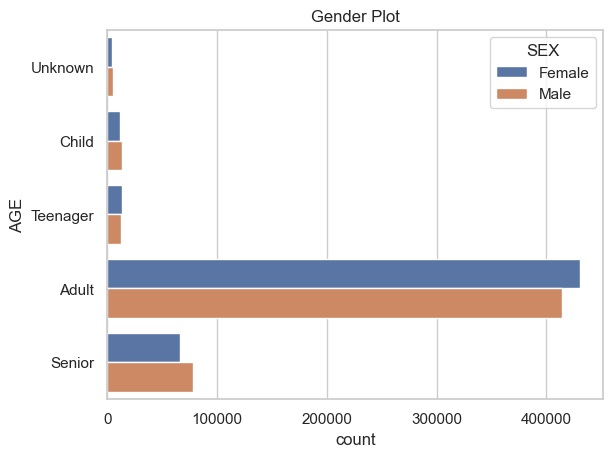

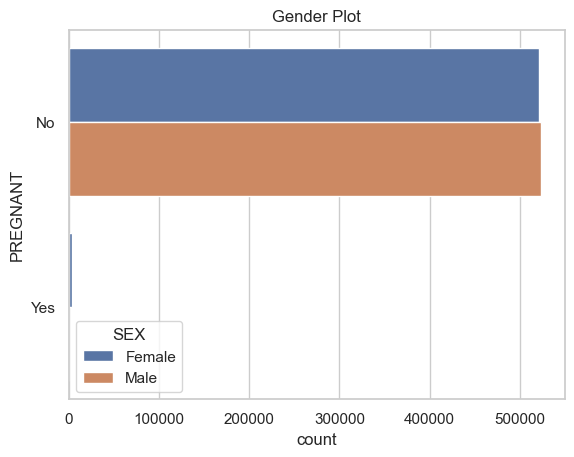

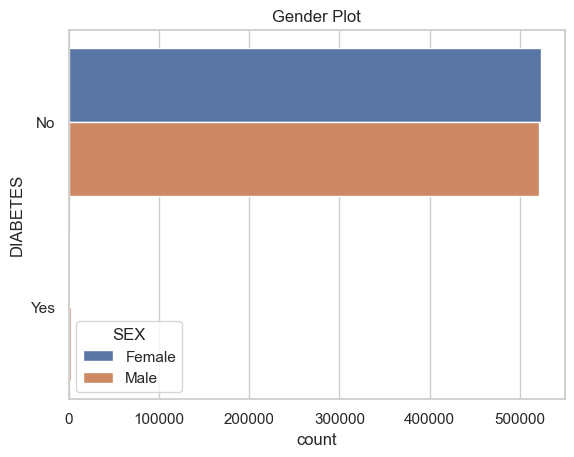

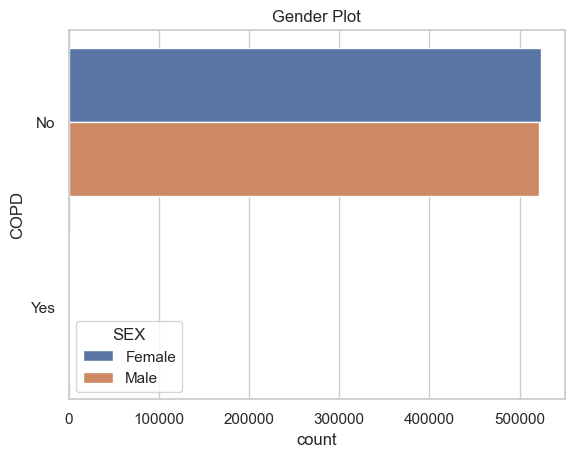

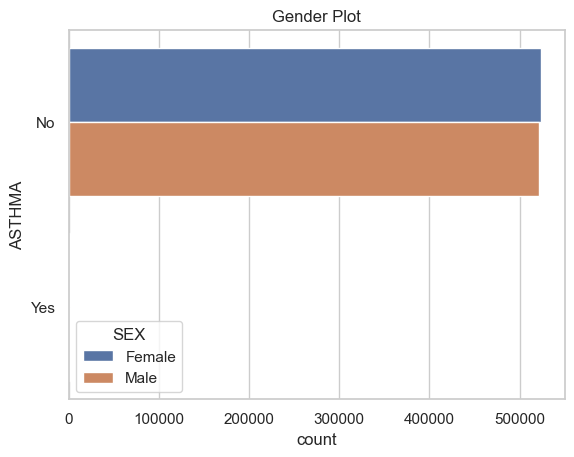

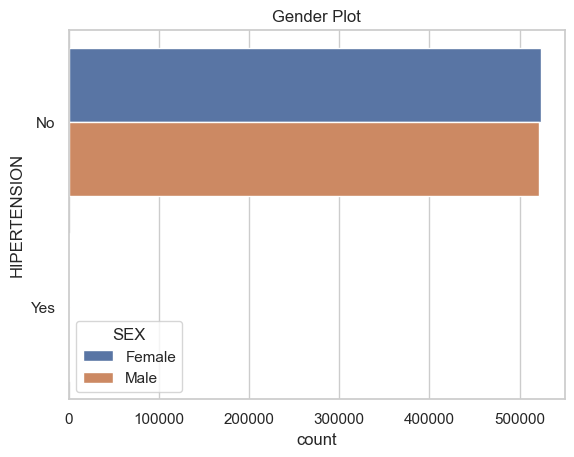

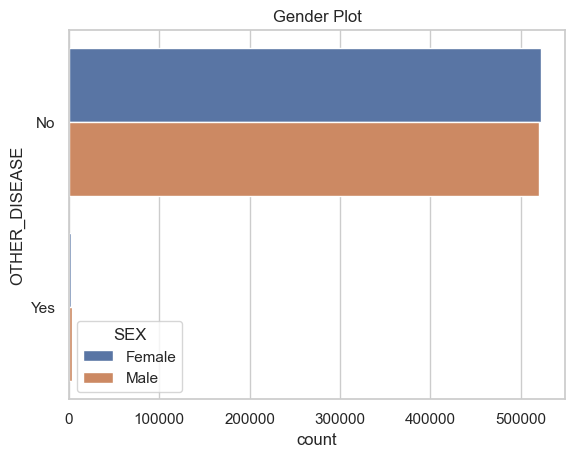

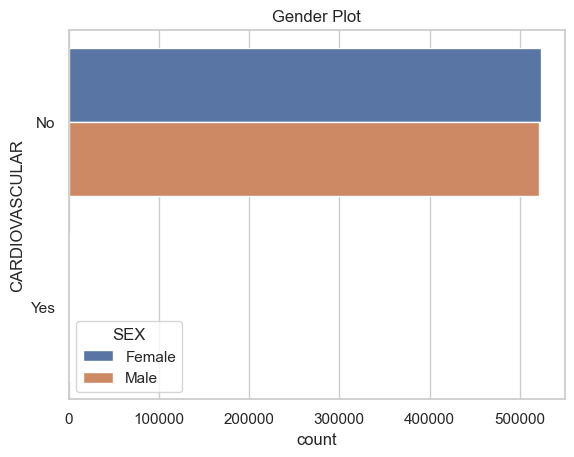

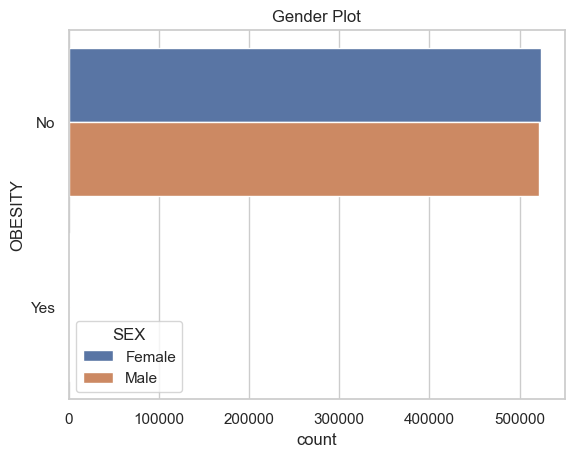

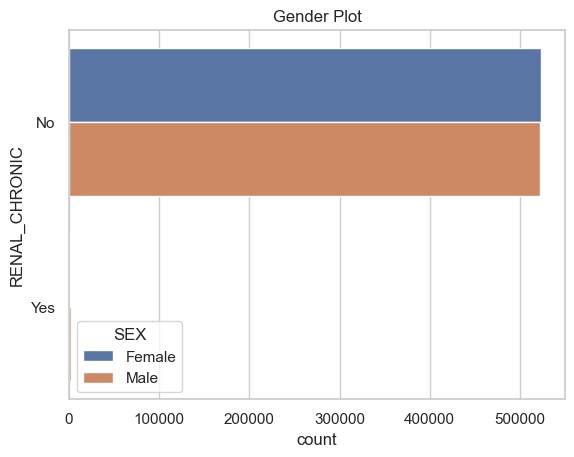

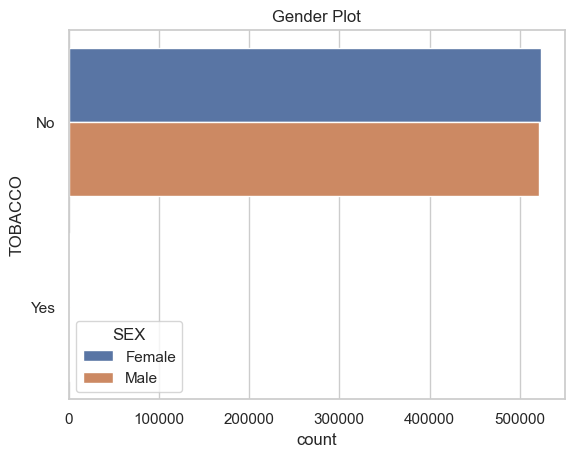

In [8]:
new_cols=cols
new_cols.remove("SEX")
for x in new_cols:
    sns.set(style="whitegrid")
    ax = sns.countplot(y=x, hue="SEX", data=df)
    plt.ylabel(x)
    plt.title('Gender Plot')
    plt.show()
    

In [10]:
#Checking if there are any people who had covid who where obese
df.loc[df['OBESITY']== "Yes"]

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEATH,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO
790,2,3,Male,2,Yes,No,No,Senior,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
853,2,3,Female,2,Yes,No,No,Senior,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1210,2,3,Male,2,Yes,No,No,Senior,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1352,2,3,Male,2,Yes,No,No,Adult,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1428,1,3,Female,2,Yes,No,No,Senior,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048244,1,13,Female,2,No,No,No,Adult,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1048258,1,13,Female,2,No,No,No,Adult,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1048259,1,13,Male,2,No,No,No,Adult,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1048260,1,13,Male,2,No,No,No,Adult,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [11]:
#Using TransactionEncoder, could take few minutes, I had to drop rows because it wouldn't compile
data = []
df_te=df.iloc[:1000]
for i in range(0, df_te.shape[0]-1):
    data.append([str(df_te.values[i,j]) for j in range(0, df_te.shape[1])])

    
th = TransactionEncoder()
th_arr = th.fit(data).transform(data)
new_df = pd.DataFrame(th_arr,columns=th.columns_)
new_df.head()


,1,2,3,Adult,Child,Female,Male,No,Senior,Teenager,Unknown,Yes
0,True,True,False,False,False,True,False,True,True,False,False,True
1,True,True,False,False,False,False,True,True,True,False,False,True
2,True,True,False,True,False,False,True,True,False,False,False,True
3,True,True,False,True,False,True,False,True,False,False,False,True
4,True,True,False,False,False,False,True,True,True,False,False,True


In [12]:
apr = apriori(new_df,min_support = 0.2, use_colnames = th.columns_)
apr.head()

,support,itemsets
0,0.777778,(1)
1,0.996997,(2)
2,0.679680,(3)
3,0.495495,(Adult)
4,0.433433,(Female)


['antecedents' 'consequents' 'antecedent support' 'consequent support'
 'support' 'confidence' 'lift' 'leverage' 'conviction']
My configuration:  antecedent support  :  0.7
    antecedents                 consequents  antecedent support  \
0           (2)                         (1)            0.996997   
1           (1)                         (2)            0.777778   
2           (1)                         (3)            0.777778   
3           (1)                     (Adult)            0.777778   
4           (1)                    (Female)            0.777778   
..          ...                         ...                 ...   
693   (No, Yes)        (2, Male, Senior, 3)            0.938939   
694     (2, No)      (3, Male, Senior, Yes)            0.996997   
695       (Yes)    (Senior, 2, Male, No, 3)            0.938939   
696         (2)  (Senior, Yes, Male, No, 3)            0.996997   
697        (No)   (Senior, Yes, 2, Male, 3)            1.000000   

     consequent suppor

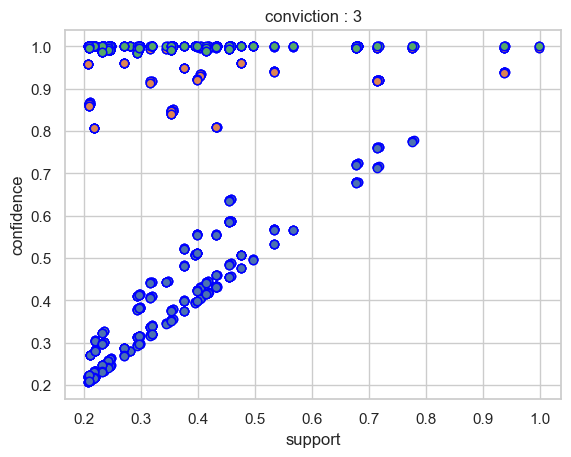

In [31]:
config = [ ('antecedent support',0.7),('confidence',0.8),('conviction',3)]
for metric, new_th in config:
    rules = association_rules(apr, metric = metric, min_threshold=new_th)
    if rules.empty:
        print("Dataframe is Empty")
    print(rules.columns.values)
    print("My configuration: ", metric, " : ",new_th)
    print(rules)
    
    support = rules.loc[:,"support"]
    confidence = rules.loc[:,'confidence']
    plt.scatter(support,confidence,edgecolors="blue")
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.title(metric+' : ' +str(new_th))
    plt.savefig('plot%03s.png'%(metric))

    

In [32]:
print(rules[rules['consequents']==frozenset({'Yes'})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Female'})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Male'})].to_string())
print("\n-------------------------------------------\n")
print(rules[rules['antecedents']==frozenset({'Senior'})].to_string())
print("\n-------------------------------------------\n")

                  antecedents consequents  antecedent support  consequent support   support  confidence      lift  leverage  conviction
4                         (3)       (Yes)            0.679680            0.938939  0.679680    1.000000  1.065032  0.041502         inf
10                   (Senior)       (Yes)            0.419419            0.938939  0.417417    0.995227  1.059948  0.023608   12.792292
14                     (3, 1)       (Yes)            0.457457            0.938939  0.457457    1.000000  1.065032  0.027933         inf
20                (Senior, 1)       (Yes)            0.298298            0.938939  0.296296    0.993289  1.057884  0.016212    9.098098
23                     (2, 3)       (Yes)            0.676677            0.938939  0.676677    1.000000  1.065032  0.041319         inf
35                (2, Senior)       (Yes)            0.416416            0.938939  0.414414    0.995192  1.059912  0.023425   12.700701
38                 (3, Adult)       (Yes)       

In [14]:
#Naive-Bayes
le = LabelEncoder()
le_arr = th.fit(data).transform(data)
new_df_label = pd.DataFrame(le_arr,columns=le.columns_)
new_df_label.head()
features_train, features_test, target_train, target_test = train_test_split(play_tennis[features],
data[target],test_size = 0.33,random_state = 54)


AttributeError: 'LabelEncoder' object has no attribute 'columns_'